<a href="https://colab.research.google.com/github/peterzk/Indepedent-Project-W2/blob/master/Independent_Project_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

What are the major factors that determine access to financial services.


### b) Defining the Metric for Success

We want to create a model that helps us predict at whether given factors such as Age, Gender, Location, Cell Phone Access, Level of Education, Marital Status, Type of Job, and Household Size determine whether one has access to financial services. Financial inclusion is measured by whether a person has a bank account or not. 

### d) Recording the Experimental Design

* My experimental design involves the analysis of survey data collected from respondents in Kenya, Rwanda, Tanzania, and Uganda. The goal is to use the survey results to create a predictive model. The model takes in indepedent variables and uses these to predict the depedent variable. 
* The depedent variable is "Has a Bank Account" which means that the respondent has a bank account. 
* The indepedent variables are Age, Gender, Location, Cell Phone Access, Level of Education, Marital Status, Type of Job, and Household Size.

### e) Data Relevance

## 2. Reading the Data

In [1]:
# importing the modules that we will be using

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Loading the data set from the source

finance_df = pd.read_csv('/content/Financial Dataset - 1.csv')


## 3. Checking the Data

In [3]:
# Determining the no. of records in the dataset

finance_df.shape

(23524, 13)

In [4]:
# Previewing the top of the dataset

finance_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Previewing the bottom of the dataset

finance_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
# Checking whether each columb has an appropriate datatype

finance_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4. External Data Source Validation

## 5. Tidying the Dataset

In [120]:
finance_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [121]:
# Checking for Null values

finance_df.isna().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
# Dealing with Null values
# I decided to drop Null values 

finance_df1 = finance_df.dropna()

In [123]:
# Checking for any duplicated values

finance_df1.duplicated().sum()

0

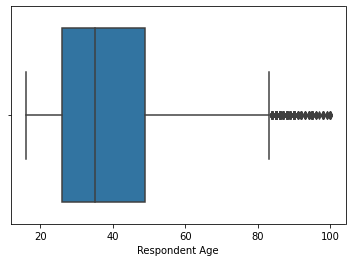

In [124]:
# Checking for outliers 

sns.boxplot(x=finance_df1['Respondent Age'])
plt.show()

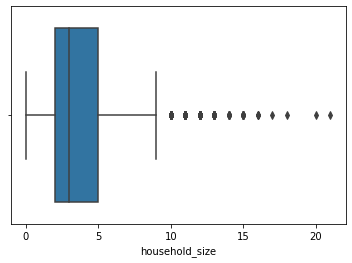

In [126]:
sns.boxplot(x=finance_df1['household_size'])
plt.show()

In [130]:
# Dealing with Anomalies

year_anomaly = finance_df1[finance_df1['year']>2018].index
finance_df1.drop(year_anomaly, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [131]:
finance_df1['year'].unique()

array([2018, 2016, 2017])

In [0]:
finance_df1.columns = ['country','uniqueid', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relationship with head', 'marital_status',
       'Level of Educuation', 'Type of Job']

## 6. Exploratory Analysis

### a) Univariate Exploratory Analysis

In [106]:
# Checking colums of the dataframe that we will use for
# univariate analysis

finance_df1.columns

Index(['country', 'uniqueid', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relationship with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [85]:
# Checking the mean age

mean_age = finance_df1['Respondent Age'].mean()

mean_age = round(mean_age)
mean_age

39

In [86]:
# Checking mean household size

mean_house = finance_df1['household_size'].mean()

mean_house = round(mean_house)
mean_house

4

In [97]:
# Checking IQR

Q1 = finance_df1.quantile(0.25)
Q3 = finance_df1.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64


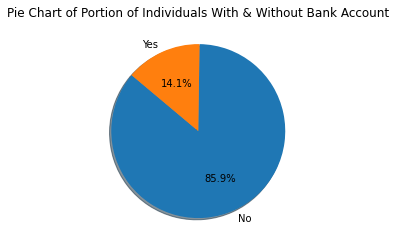

In [18]:

# Pie chart for respondents who hold a bank account

fin = finance_df1['Has a Bank account'].value_counts()

fin_val = fin.values.tolist()

labels = fin.keys().tolist()
plt.pie(fin_val, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)

plt.title('Pie Chart of Portion of Individuals With & Without Bank Account')
plt.show()

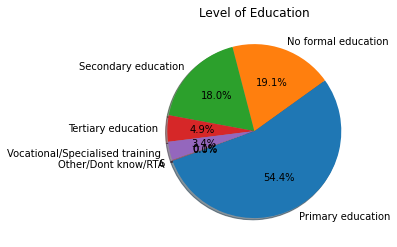

In [0]:
# Pie chart for respondents level of education

edu = finance_df1['Level of Educuation'].value_counts()

edu_values = edu.values.tolist()
lables = edu.keys().tolist()

plt.pie(edu_values, labels = lables, autopct = '%1.1f%%', shadow = True, startangle = 200)

plt.title('Level of Education')
plt.show()

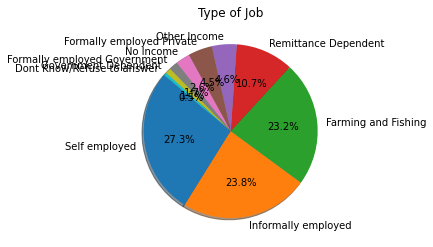

In [107]:
# Pie chart for respondent`s job type

job = finance_df1['Type of Job'].value_counts()

job_values = job.values.tolist()
lables = job.keys().tolist()

plt.pie(job_values, labels = lables, autopct = '%1.1f%%', shadow = True, startangle = 140)

plt.title('Type of Job')
plt.show()

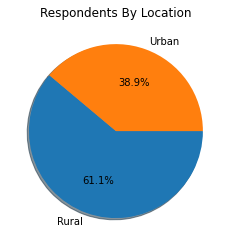

In [109]:
# Pie chart of respondents location 

location = finance_df1['Type of Location'].value_counts()

location_val = location.values.tolist()

labels = location.keys().tolist()
plt.pie(location_val, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)

plt.title('Respondents By Location')
plt.show()

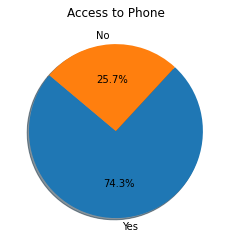

In [112]:
# Pie chart of respondents with phone access

phone = finance_df1['Cell Phone Access'].value_counts()

phone_val = phone.values.tolist()

labels = phone.keys().tolist()
plt.pie(phone_val, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)

plt.title('Access to Phone')
plt.show()

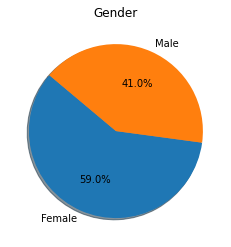

In [134]:
# Pie chart of respondents gender

gender_resp = finance_df1['gender_of_respondent'].value_counts()

gender_val = gender_resp.values.tolist()

labels = gender_resp.keys().tolist()
plt.pie(gender_val, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)

plt.title('Gender')
plt.show()

### b) Bivariate Exploratory Analysis

In [110]:
finance_df1.columns

Index(['country', 'uniqueid', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relationship with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

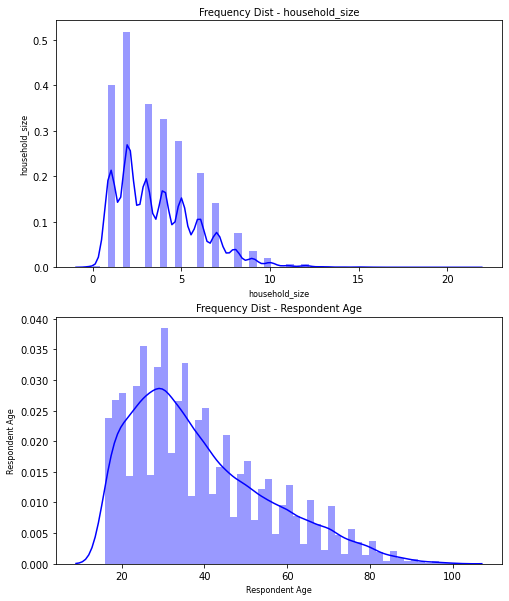

In [132]:
# ploting the frequency distribution of year, household_size and respondent age

col_names = ['household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
  sns.distplot(finance_df1[col_val], hist=True, ax=ax[i], color='blue')
  ax[i].set_title('Frequency Dist - ' + col_val, fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel(col_val, fontsize=8)

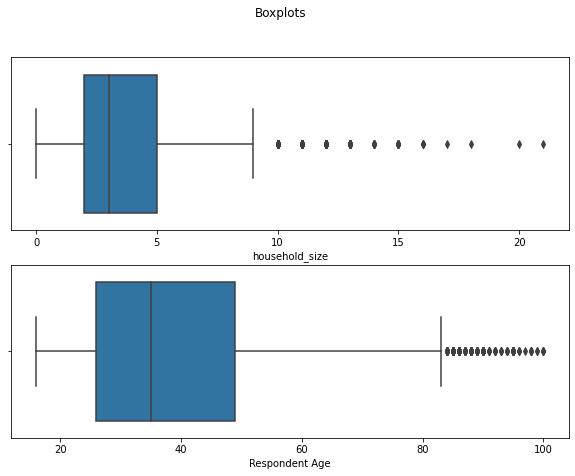

In [21]:
fig, ((ax1, ax2)) = plt.subplots(2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(finance_df1['household_size'], ax=ax1)
sns.boxplot(finance_df1['Respondent Age'], ax=ax2)


plt.show()

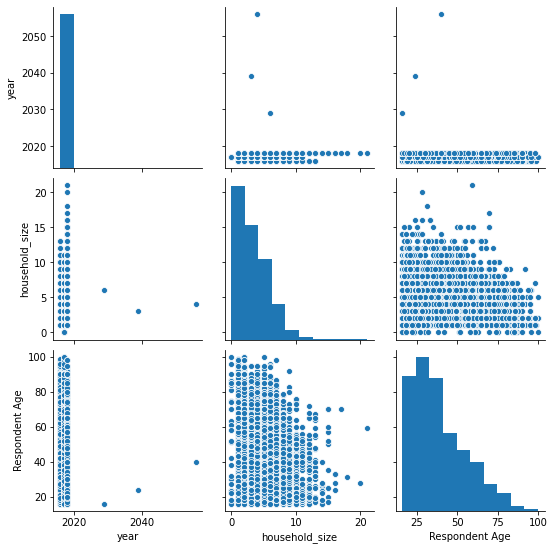

In [22]:
sns.pairplot(finance_df1)
plt.show()

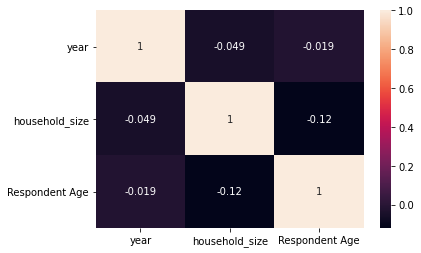

In [0]:
sns.heatmap(finance_df1.corr(),annot=True)
plt.show()

### c) Multivariate Exploratory Analysis

In [23]:
finance_df1.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [0]:
# Before implementing dimension reduction, I need to make sure that my dataframe 
# has numeric values. I will also remove the columns that i do not need.

finance_reduction = finance_df1.drop('uniqueid', axis=1)


In [0]:
finance_reduction.columns = ['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relationship with head', 'marital_status',
       'Level of Educuation', 'Type of Job']

In [0]:
# I need give values 'Has a Bank account', 'Type of Location',
# 'Cell Phone Access' and 'Respondent Age' dummy values of "0" and "1"

def bank_account(x):

  if x == "Yes":
    return 1
  else:
    return 0

def gender(x):
  if x == "Male":
    return 1
  else:
    return 0

def location(x):
  if x == "Urban":
    return 1
  else:
    return 0

def phone(x):
  if x == "Yes":
    return 1
  else:
    return 0

In [0]:
# Using the functions above to apply dummy values to the specific variables

finance_reduction['Has a Bank account'] = finance_reduction['Has a Bank account'].apply(lambda x:bank_account(x))

finance_reduction['gender_of_respondent'] = finance_reduction['gender_of_respondent'].apply(lambda x:gender(x))

finance_reduction['Type of Location'] = finance_reduction['Type of Location'].apply(lambda x:location(x))

finance_reduction['Cell Phone Access'] = finance_reduction['Cell Phone Access'].apply(lambda x:phone(x))

In [29]:
finance_reduction['Respondent Age'].max()

100.0

In [0]:
# Creating dummy variables for the other variables

finance_reduction = pd.get_dummies(finance_reduction, columns=['The relationship with head'], prefix = ['R.W.H'])
finance_reduction = pd.get_dummies(finance_reduction, columns=['year'], prefix = ['Year'])
finance_reduction = pd.get_dummies(finance_reduction, columns=['marital_status'], prefix = ['Status'])
finance_reduction = pd.get_dummies(finance_reduction, columns=['Level of Educuation'], prefix = ['Education'])
finance_reduction = pd.get_dummies(finance_reduction, columns=['Type of Job'], prefix = ['Job'])
finance_reduction = pd.get_dummies(finance_reduction, columns=['country'], prefix = ['Country'])

In [49]:
finance_df1.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [0]:
# Preprocessing

X = finance_reduction.drop('Has a Bank account', axis=1)
y = finance_reduction['Has a Bank account']

In [0]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=101)

In [0]:
# Normalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Applying PCA - Using 1 Principal Component

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [70]:
# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_

explained_variance


array([1.09629878e-01, 7.57849632e-02, 6.40251949e-02, 5.17481123e-02,
       4.62518328e-02, 3.89150552e-02, 3.61727793e-02, 3.32441545e-02,
       3.00564088e-02, 2.86538066e-02, 2.53020025e-02, 2.46915084e-02,
       2.40657313e-02, 2.37814972e-02, 2.37316177e-02, 2.35101100e-02,
       2.32595422e-02, 2.32143959e-02, 2.31985279e-02, 2.29149517e-02,
       2.28419571e-02, 2.24675685e-02, 2.23368269e-02, 2.20877704e-02,
       2.15283668e-02, 1.95200933e-02, 1.84199334e-02, 1.75874919e-02,
       1.50315568e-02, 1.40639373e-02, 1.36138354e-02, 1.07132544e-02,
       1.03917519e-02, 9.73154013e-03, 7.51204521e-03, 1.41269164e-31,
       1.88686544e-32, 3.05778497e-33, 2.72723854e-33, 2.28945410e-33,
       2.00159726e-33, 1.41750175e-33, 9.01499169e-34])

In [0]:
# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [73]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3999    5]
 [ 636   29]]
Accuracy 0.862711501392161


In [0]:
# Using Two Principal components

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Training and making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [80]:
# Performance evaluation with 2 PCA

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4004    0]
 [ 665    0]]
Accuracy 0.8575712143928036


## 7. Implementing the Solution

## 8. Challenging the Solution

## 9. Follow up Questions 